In [21]:
import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('GSAF5.csv', encoding="ISO-8859-1")

In [23]:
data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [24]:
#Selecciono columnas que me interesan para trabajar mis hipótesis. 
#1) ¿EN qué país y en qué area se producen más ataques de tiburones? 
#2) ¿Cuáles son las actividades en las que se producen más ataques?
#3) ¿Influyó el estreno de la película Tiburón (1975) en un mayor interés por registrar casos o el interés por los ataques de tiburones eran previos a la película?
colnames = ['Case Number','Date', 'Year', 'Country', 'Area', 'Fatal (Y/N)', 'Activity', 'original order']
#pd.DataFrame(data, columns=colnames).head()
proyecto=pd.DataFrame(data, columns=colnames)
proyecto.head(10)


,Case Number,Date,Year,Country,Area,Fatal (Y/N),Activity,original order
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,N,Surfing,5993
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,N,Surfing,5992
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,N,Surfing,5991
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5990
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5989
5,2016.09.15.R,15-Sep-16,2016,AUSTRALIA,Western Australia,N,Fishing,5988
6,2016.09.11,11-Sep-16,2016,USA,Florida,N,Wading,5987
7,2016.09.07,07-Sep-16,2016,USA,Hawaii,N,Swimming,5986
8,2016.09.06,06-Sep-16,2016,NEW CALEDONIA,North Province,Y,Kite surfing,5985
9,2016.09.05.b,05-Sep-16,2016,USA,South Carolina,N,Boogie boarding,5984


In [25]:
null_cols = proyecto.isnull().sum()
null_cols[null_cols > 0]

Country         43
Area           402
Fatal (Y/N)     19
Activity       527
dtype: int64

In [26]:
#proyecto1=proyecto
#proyecto1.dropna().head(300) QUERÍA ELIMINAR TODAS LAS FILAS QUE TUVIERAN AL MENOS UN NULO PEOR ME DI CUENTA DE QUE SALÍAN DEMASIADAS.

In [27]:
null_cols = proyecto.isnull().sum()
null_cols[null_cols > 0]
#En principio pensé eliminar todas las filas que tuvieran celdas vacías para dejar los nulos a 0 en las columnas que me interesaban pero luego me dí cuenta de que perdía demasiadas columnas ya que los nulos podían estar en mis columnas o en otras.

Country         43
Area           402
Fatal (Y/N)     19
Activity       527
dtype: int64

In [28]:
proyecto.dtypes
#Revisión de types para saber con qué tipo de datos dispongo en cada columna.

Case Number       object
Date              object
Year               int64
Country           object
Area              object
Fatal (Y/N)       object
Activity          object
original order     int64
dtype: object

In [29]:
proyecto

,Case Number,Date,Year,Country,Area,Fatal (Y/N),Activity,original order
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,N,Surfing,5993
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,N,Surfing,5992
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,N,Surfing,5991
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5990
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5989
5,2016.09.15.R,15-Sep-16,2016,AUSTRALIA,Western Australia,N,Fishing,5988
6,2016.09.11,11-Sep-16,2016,USA,Florida,N,Wading,5987
7,2016.09.07,07-Sep-16,2016,USA,Hawaii,N,Swimming,5986
8,2016.09.06,06-Sep-16,2016,NEW CALEDONIA,North Province,Y,Kite surfing,5985
9,2016.09.05.b,05-Sep-16,2016,USA,South Carolina,N,Boogie boarding,5984


In [30]:
before = len(proyecto)
data = data.drop_duplicates()
after = len(proyecto)
print('Number of duplicate records dropped: ', str(before - after))
#NO hay líneas duplicadas en el documento.

Number of duplicate records dropped:  0


In [31]:
print(proyecto.info())
#Hay sufiencientes datos como para hacer las preguntas que quiero hacer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 8 columns):
Case Number       5992 non-null object
Date              5992 non-null object
Year              5992 non-null int64
Country           5949 non-null object
Area              5590 non-null object
Fatal (Y/N)       5973 non-null object
Activity          5465 non-null object
original order    5992 non-null int64
dtypes: int64(2), object(6)
memory usage: 374.6+ KB
None


In [32]:
proyecto.replace(np.nan, "0")
proyecto.head(100)
#Cambio los nan por 0 por si lo necesitara aunque en este documento no parece que vaya a hacer falta.

,Case Number,Date,Year,Country,Area,Fatal (Y/N),Activity,original order
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,N,Surfing,5993
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,N,Surfing,5992
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,N,Surfing,5991
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5990
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5989
5,2016.09.15.R,15-Sep-16,2016,AUSTRALIA,Western Australia,N,Fishing,5988
6,2016.09.11,11-Sep-16,2016,USA,Florida,N,Wading,5987
7,2016.09.07,07-Sep-16,2016,USA,Hawaii,N,Swimming,5986
8,2016.09.06,06-Sep-16,2016,NEW CALEDONIA,North Province,Y,Kite surfing,5985
9,2016.09.05.b,05-Sep-16,2016,USA,South Carolina,N,Boogie boarding,5984


In [33]:
#OBVIAR null_cols1 = proyecto1.isnull().sum()
# null_cols1[null_cols1 > 0]

In [34]:
colnames1 = ['Case Number', 'Year', 'Country', 'Area']
proyecto1=pd.DataFrame(proyecto, columns=colnames1)
proyecto1.head(100)
#FIltrado por columnas para responder a la primera tesis.

,Case Number,Year,Country,Area
0,2016.09.18.c,2016,USA,Florida
1,2016.09.18.b,2016,USA,Florida
2,2016.09.18.a,2016,USA,Florida
3,2016.09.17,2016,AUSTRALIA,Victoria
4,2016.09.15,2016,AUSTRALIA,Victoria
5,2016.09.15.R,2016,AUSTRALIA,Western Australia
6,2016.09.11,2016,USA,Florida
7,2016.09.07,2016,USA,Hawaii
8,2016.09.06,2016,NEW CALEDONIA,North Province
9,2016.09.05.b,2016,USA,South Carolina


In [35]:
proyecto1.set_index('Country')
#INtento cambiar el index para contar pero no puedo. Lo hago contando por medio de las columnas directamente.

,Case Number,Year,Area
Country,,,
USA,2016.09.18.c,2016,Florida
USA,2016.09.18.b,2016,Florida
USA,2016.09.18.a,2016,Florida
AUSTRALIA,2016.09.17,2016,Victoria
AUSTRALIA,2016.09.15,2016,Victoria
AUSTRALIA,2016.09.15.R,2016,Western Australia
USA,2016.09.11,2016,Florida
USA,2016.09.07,2016,Hawaii
NEW CALEDONIA,2016.09.06,2016,North Province


In [36]:
proyecto1['Country'].value_counts() #Quería pasar a indice para contar. BUsco otra manera y contar dentro de las columnas.

USA                               2116
AUSTRALIA                         1279
SOUTH AFRICA                       565
PAPUA NEW GUINEA                   133
NEW ZEALAND                        125
BRAZIL                             102
BAHAMAS                             98
MEXICO                              81
ITALY                               71
FIJI                                62
PHILIPPINES                         59
REUNION                             57
NEW CALEDONIA                       51
MOZAMBIQUE                          44
CUBA                                42
SPAIN                               40
INDIA                               37
EGYPT                               36
CROATIA                             34
JAPAN                               32
PANAMA                              32
SOLOMON ISLANDS                     29
IRAN                                29
GREECE                              25
HONG KONG                           24
JAMAICA                  

In [37]:
%matplotlib inline

In [38]:
paises=proyecto1['Country'].value_counts().head()

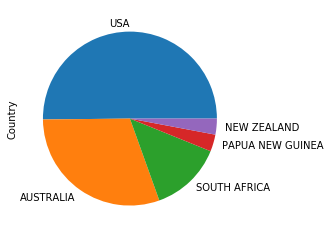

In [39]:
paises1=paises.plot('pie')
paises1

In [40]:
paises1.savefig('plot.png')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [41]:
proyecto1['Country'].value_counts().sum() 
#total ataques
total_ataques=5949

In [42]:
proyecto1['Country'].value_counts().sum() 
#total ataques
total_ataques=5949

In [43]:
proyecto1['Area'].value_counts()
max_ataques_por_area_Florida=990
#De un total de 5949 ataques, 2116 se produjeron en USA, 990 de ellos en FLorida, que concentra casi una quinta parte del total de los ataques de tuburones en el mundo.c

In [44]:
proyecto1['Area'].value_counts()

Florida                                 990
New South Wales                         468
Queensland                              300
Hawaii                                  282
California                              276
KwaZulu-Natal                           210
Western Cape Province                   188
Western Australia                       172
Eastern Cape Province                   156
South Carolina                          145
South Australia                         103
North Carolina                          100
Victoria                                 81
Texas                                    71
Torres Strait                            70
Pernambuco                               70
North Island                             65
New Jersey                               49
Tasmania                                 41
South Island                             39
Oregon                                   28
New York                                 27
Northern Territory              

In [45]:
%matplotlib inline

In [46]:
areas=proyecto1['Area'].value_counts().head(10)

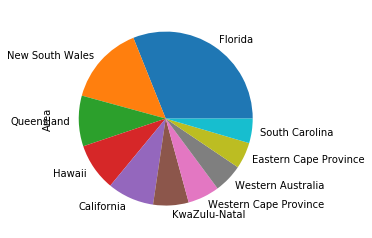

In [47]:
areas.plot('pie')

In [48]:
#Paso a la tesis 3 (siento el desorden). Saco el número de casos agrupados por años.
proyecto1.loc[(proyecto1['Year'] >=1975) & (proyecto1['Year'] <=1980)].count() #Número de casos después de la película Tiburón (1975-1980)

Case Number    199
Year           199
Country        199
Area           190
dtype: int64

In [49]:
proyecto1.loc[(proyecto1['Year'] >=1970) & (proyecto1['Year'] <=1974)].count() #Número de casos antes de la película Tiburón (1970-1974)

Case Number    170
Year           170
Country        165
Area           160
dtype: int64

In [50]:
#Para consolidar la tesis saco los datos de los dos períodos inmediatamente anteriores y posteriores.
proyecto1.loc[(proyecto1['Year'] >=1981) & (proyecto1['Year'] <=1985)].count() #Número de casos después de la película Tiburón (1975-1980)

Case Number    217
Year           217
Country        216
Area           209
dtype: int64

In [51]:
proyecto1.loc[(proyecto1['Year'] >=1965) & (proyecto1['Year'] <=1969)].count() #Número de casos antes de la película Tiburón (1970-1974)

Case Number    233
Year           233
Country        231
Area           206
dtype: int64

In [52]:
proyecto1.loc[(proyecto1['Year'] >=1965) & (proyecto1['Year'] <=1969)].loc[(proyecto1['Year'] >=1970) & (proyecto1['Year'] <=1974)].loc[(proyecto1['Year'] >=1975) & (proyecto1['Year'] <=1980)].loc[(proyecto1['Year'] >=1981) & (proyecto1['Year'] <=1985)]
#INtenté meter los cuatro datos en una misma línea de código y sacar la gráfica a partir de ahí pero no lo conseguí.

,Case Number,Year,Country,Area


In [53]:
proyecto1.loc[(proyecto1['Country'] == 'USA') & (proyecto1['Area'] == 'Florida')].count()

Case Number    990
Year           990
Country        990
Area           990
dtype: int64

In [54]:
proyecto.head(10)
#Recupero la columna de Activity para responder a la segunda tesis.

,Case Number,Date,Year,Country,Area,Fatal (Y/N),Activity,original order
0,2016.09.18.c,18-Sep-16,2016,USA,Florida,N,Surfing,5993
1,2016.09.18.b,18-Sep-16,2016,USA,Florida,N,Surfing,5992
2,2016.09.18.a,18-Sep-16,2016,USA,Florida,N,Surfing,5991
3,2016.09.17,17-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5990
4,2016.09.15,16-Sep-16,2016,AUSTRALIA,Victoria,N,Surfing,5989
5,2016.09.15.R,15-Sep-16,2016,AUSTRALIA,Western Australia,N,Fishing,5988
6,2016.09.11,11-Sep-16,2016,USA,Florida,N,Wading,5987
7,2016.09.07,07-Sep-16,2016,USA,Hawaii,N,Swimming,5986
8,2016.09.06,06-Sep-16,2016,NEW CALEDONIA,North Province,Y,Kite surfing,5985
9,2016.09.05.b,05-Sep-16,2016,USA,South Carolina,N,Boogie boarding,5984


In [55]:
proyecto.iloc[75:150]
#Estoy tratando de detectar posibles erratas en las localizaciones.

,Case Number,Date,Year,Country,Area,Fatal (Y/N),Activity,original order
75,2016.04.07.a,07-Apr-16,2016,USA,Florida,N,SUP,5918
76,2016.03.31,31-Mar-16,2016,USA,Hawaii,N,Snorkeling,5917
77,2016.03.30,30-Mar-16,2016,AUSTRALIA,New South Wales,N,Surfing,5916
78,2016.03.28.b,28-Mar-16,2016,USA,Florida,N,NaN,5915
79,2016.03.28.a,28-Mar-16,2016,AUSTRALIA,New South Wales,N,Surfing,5914
80,2016.03.26,26-Mar-16,2016,BAHAMAS,NaN,N,NaN,5913
81,2016.03.13,13-Mar-16,2016,USA,California,N,Surfing,5912
82,2016.03.11,11-Mar-16,2016,USA,Florida,N,Body surfing,5911
83,2016.03.10,10-Mar-16,2016,Fiji,Vanua Levu,Y,Diving for beche-de-mer,5910
84,2016.03.04,04-Mar-16,2016,USA,Florida,N,NaN,5909


In [56]:
proyecto['Activity'].value_counts()
#Cuento los valores pero me doy cuenta de que hay algunas categorías que se pueden agrupar bajo la misma etiqueta, como swimming y bathing.

Surfing                                                                                                                                               904
Swimming                                                                                                                                              819
Fishing                                                                                                                                               414
Spearfishing                                                                                                                                          321
Bathing                                                                                                                                               153
Wading                                                                                                                                                144
Diving                                                                      

In [57]:
proyecto['Activity'].replace('Bathing', 'Swimming', inplace=True) 

In [58]:
proyecto['Activity'].value_counts()

Swimming                                                                                                                                              972
Surfing                                                                                                                                               904
Fishing                                                                                                                                               414
Spearfishing                                                                                                                                          321
Wading                                                                                                                                                144
Diving                                                                                                                                                123
Standing                                                                    

In [59]:
zonas=proyecto['Activity'].value_counts().head(10)

In [60]:
%matplotlib inline

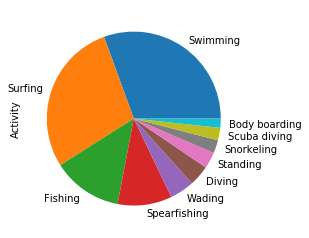

In [61]:
zonas.plot(kind='pie')

In [62]:
#Conclusión. Si no quieres ser atacado por un tiburón es mejor que evites realizar deportes acuáticos, especialmente los relacionados con el surf, en USA, especialmente en FLorida.

In [ ]:
#proyecto.reset_index.to_csv('proyecto_pandas', header=True, index=False) 
proyecto.to_csv('proyecto_pandas.csv', index=False)

In [ ]:
proyecto1.to_csv('proyecto_pandas1.csv', index=False)

In [ ]:
proyecto['Activity'].value_counts().to_csv('prueba.csv', header=False, index=True)

In [ ]:
proyecto1['Country'].value_counts().to_csv('nueva_prueba.csv', header=False, index=True)

In [ ]:
proyecto1['Area'].value_counts().to_csv('por_areas.csv', header=False, index=True)

AttributeError: 'AxesSubplot' object has no attribute 'to_excel'

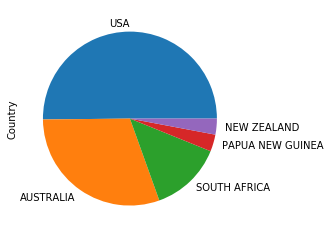

In [63]:
paises.plot('pie').to_excel('por_paises.csv', header=False, index=True)

In [64]:
proyecto1.loc[(proyecto1['Year'] >=1975) & (proyecto1['Year'] <=1980)].count().to_csv('1975_1980.csv', header=False, index=True) #Número de casos después de la película Tiburón (1975-1980)

In [65]:
proyecto1.loc[(proyecto1['Year'] >=1970) & (proyecto1['Year'] <=1974)].count().to_csv('1970_1974.csv', header=False, index=True)

In [66]:
proyecto1.loc[(proyecto1['Year'] >=1981) & (proyecto1['Year'] <=1985)].count().to_csv('1981_1985.csv', header=False, index=True)

In [67]:
proyecto1.loc[(proyecto1['Year'] >=1965) & (proyecto1['Year'] <=1969)].count().to_csv('1965_1969.csv', header=False, index=True) #Número de casos antes de la película Tiburón (1970-1974)